In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
### Loading the file saved in local system to dataframe ###
habermandata = pd.read_csv('D:\Study_materials\Applied_AI\ipython_Notebooks/haberman.csv')

## High Level statistics

In [3]:
# 1: No. of points ands features in the dataset
habermandata.shape

(306, 4)

The dataset is having 306 rows and 4 features/columns in it.

In [5]:
# 2: No. of classes present in the dataset
habermandata.status.unique()

array([1, 2], dtype=int64)

As "status" column is the right most column, hence it is considered as the Dependent feature. Here in "status" column, there are 2 values available (1,2). Hence there are 2 classes present in the dataset.

In [6]:
# 3: No. of data points per class
habermandata.status.value_counts()

1    225
2     81
Name: status, dtype: int64

There are 225 rows having status as 1 and 81 rows having status as 2.

In [69]:
#Let's convert status values 1 and 2 to Alive and Dead respectively.

habermandata['status'] = habermandata['status'].apply(lambda x:"Alive" if x == 1 else "Dead")

# Objective:

To do exploratory data analysis on the given dataset to understand data, making univariate and bi-variate analysis to understand which feature or combination of features are useful for classification. Final objective is to classify if a new patient will survive cancer or not.

In [7]:
habermandata.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## Univariate analysis based on different features:

### 1. Distribution Plot:

#### 1.1 Age:

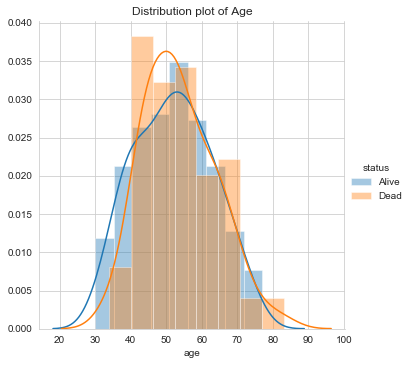

In [46]:
sns.FacetGrid(habermandata, hue ="status", height = 5).map(sns.distplot, "age").add_legend()
plt.title('Distribution plot of Age')
plt.show()

#### Observation:
1. Patients having age ranging between 30 to 34 have survived after cancer treatment.
2. Patients having age ranging between 77 to 83 have not survived after cancer treatement.
3. For remaining patients, it is difficult to take a side as data are overlapped.
4. Age alone is not an important parameter in determining the survival of a patient.

#### 1.2 Year:

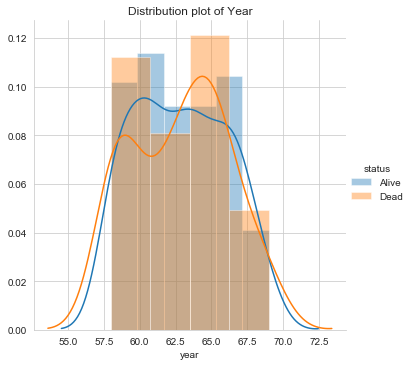

In [47]:
sns.FacetGrid(habermandata, hue="status", height = 5).map(sns.distplot, "year").add_legend()
plt.title('Distribution plot of Year')
plt.show()

#### Observation:
1. It is difficult to say anything as the data are overlapped.
2. Year is not an important feature for determining survival of a patient.

#### 1.3 nodes:

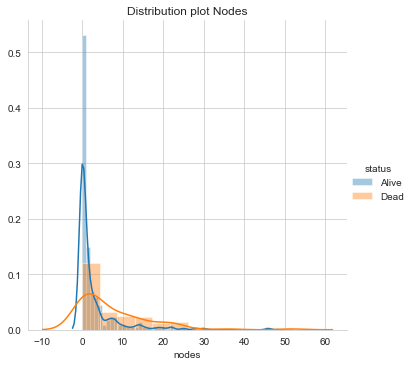

In [48]:
sns.FacetGrid(habermandata, hue ='status', height = 5).map(sns.distplot, 'nodes').add_legend()
plt.title('Distribution plot Nodes')
plt.show()

#### Observation:
1. As number of positive axillary nodes increase the chance of survival decreases.

### 2. PDF and CDF plots:

#### 2.1 Age:

In [39]:
# For this exercise, let's split our data into 2 parts as there are 2 status available i.e. alive or dead

habermandata_alive = habermandata.loc[habermandata["status"]=='Alive']
habermandata_dead = habermandata.loc[habermandata["status"]=='Dead']

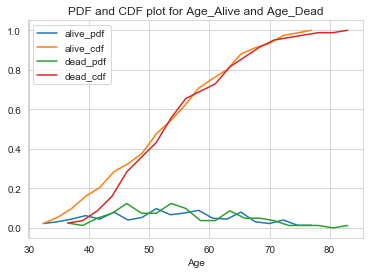

In [49]:
counts, bin_edges = np.histogram(habermandata_alive['age'],bins=20, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(habermandata_dead['age'],bins=20, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.xlabel('Age')
plt.title('PDF and CDF plot for Age_Alive and Age_Dead')
plt.legend(['alive_pdf', 'alive_cdf','dead_pdf', 'dead_cdf'])
plt.show()

#### Observation:
Huge overlap and thus unble to differentiate the class based on the plots

#### 2.2 Year:

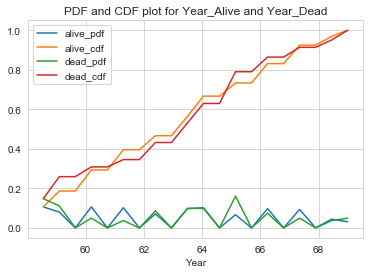

In [50]:
counts, bin_edges = np.histogram(habermandata_alive['year'],bins=20, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(habermandata_dead['year'],bins=20, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.xlabel('Year')
plt.title('PDF and CDF plot for Year_Alive and Year_Dead')
plt.legend(['alive_pdf', 'alive_cdf','dead_pdf', 'dead_cdf'])
plt.show()

#### Observation:
Huge overlap and thus unble to differentiate the class based on the plots

#### 2.3 Nodes:

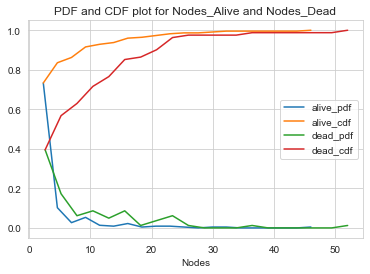

In [51]:
counts, bin_edges = np.histogram(habermandata_alive['nodes'],bins=20, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

counts, bin_edges = np.histogram(habermandata_dead['nodes'],bins=20, density=True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)


plt.xlabel('Nodes')
plt.title('PDF and CDF plot for Nodes_Alive and Nodes_Dead')
plt.legend(['alive_pdf', 'alive_cdf','dead_pdf', 'dead_cdf'])
plt.show()

#### Observation:
1) overlap of data points is less compared to other features, but overlap still exist thus it is difficult to set a threshold for positive axillary nodes which will differentiate both class of patients

### 3. Box plots

#### 3.1 Age:

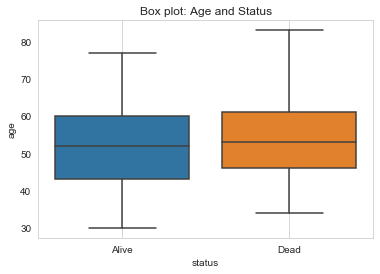

In [59]:
sns.boxplot(x = 'status', y = 'age', data = habermandata)
plt.title('Box plot: Age and Status')
plt.grid()
plt.show()

####  Observation:
Univariate analysis on age give similar box plots for both classes.

#### 3.2 Year:

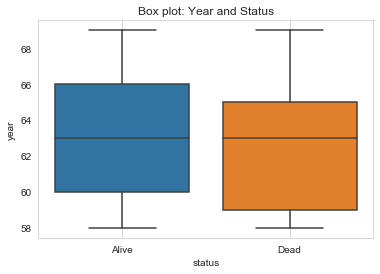

In [60]:
sns.boxplot(x = 'status', y = 'year', data = habermandata)
plt.title('Box plot: Year and Status')
plt.grid()
plt.show()

#### 3.3 Nodes:

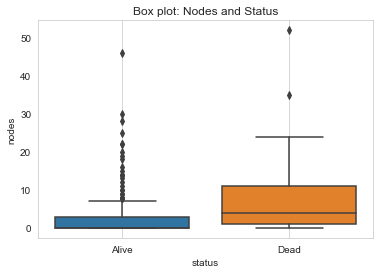

In [57]:
sns.boxplot(x = 'status', y = 'nodes', data = habermandata)
plt.title('Box plot: Nodes and Status')
plt.grid()
plt.show()

#### Observation:
1. We could see from the box plot that maximum of the patients who survived cancer after surgery is having 0 nodes.

2. About 50% of the patients who survived had no positive axillary nodes

### 4. Violin plots:

#### 4.1 Age:

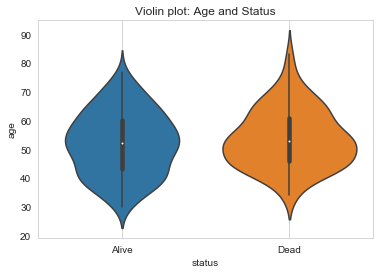

In [62]:
sns.violinplot(x = 'status', y = 'age', data = habermandata, size = 10)
plt.title('Violin plot: Age and Status')
plt.grid()
plt.show()

#### Observation:
Univariate analysis on age give similar violin plots for both classes.

#### 4.2 Year:

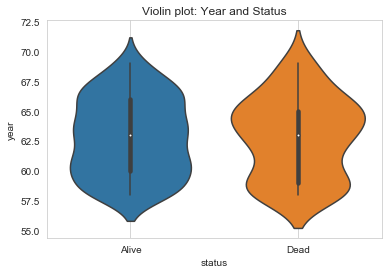

In [63]:
sns.violinplot(x = 'status', y = 'year', data = habermandata, size = 10)
plt.title('Violin plot: Year and Status')
plt.grid()
plt.show()

#### Observation:
univariate analysis based on Year gives similar plots for both class with substantial overlap of data points

#### 4.3. Nodes:

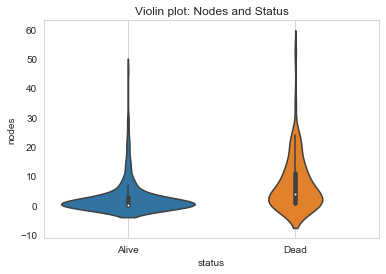

In [64]:
sns.violinplot(x = 'status', y = 'nodes', data = habermandata, size = 10)
plt.title('Violin plot: Nodes and Status')
plt.grid()
plt.show()

#### Observation:
We can find the same observation like in box plot i.e. most patients who survived cancer after surgery are having 0 nodes.

## Bi-Variate analysis

### 5. 2-D scatter plot

#### 5.1 Year and Age:

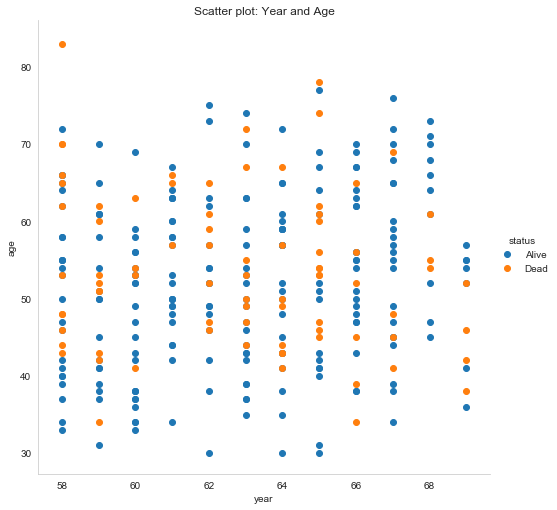

In [65]:
sns.FacetGrid(habermandata, hue = 'status', height = 7).map(plt.scatter, 'year','age').add_legend()
plt.title('Scatter plot: Year and Age')
plt.grid()
plt.show()

#### Observation: 
As the data points are overlapping, hence it is difficult to say something.

#### 5.2 Nodes and Age:

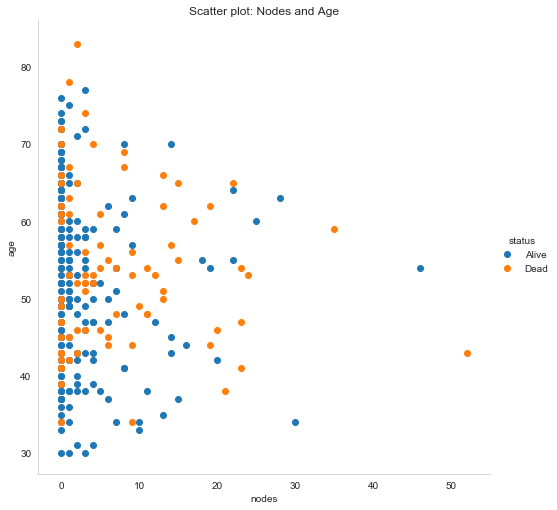

In [66]:
sns.FacetGrid(habermandata, hue='status', height = 7).map(plt.scatter, 'nodes','age').add_legend()
plt.title('Scatter plot: Nodes and Age')
plt.grid()
plt.show()

#### Observation: 
Here also points are overlapping. Hence difficult to say anything.

#### 5.3 Nodes and Year:

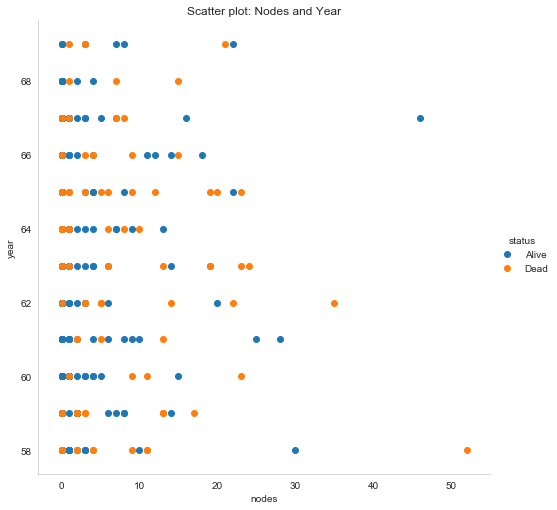

In [67]:
sns.FacetGrid(habermandata, hue='status', height = 7).map(plt.scatter, 'nodes','year').add_legend()
plt.title('Scatter plot: Nodes and Year')
plt.grid()
plt.show()

#### Observation: 
Can't say anything as the points are overlapping.

### 6. Pair plot:

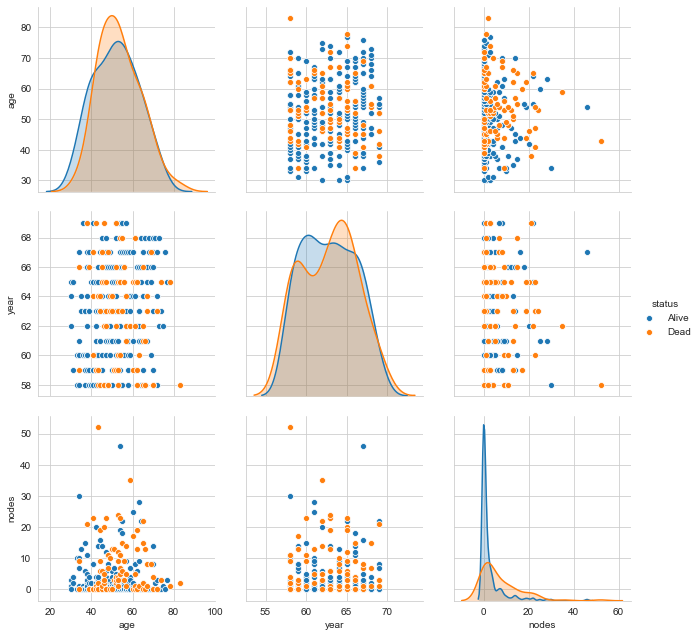

In [70]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(habermandata, hue='status', height = 3)
plt.show()

#### Observation:

As 'age' and 'year' have overlapping curves, hence we are not able to find any proper observation which can classify the status. However 'nodes' is the only feature which is effective and can help in classifying the data. Also nodes doesn't depend on age.

Now i will findout the mean values of the features to see the basic insight.

In [71]:
habermandata_alive.mean()

age      52.017778
year     62.862222
nodes     2.791111
dtype: float64

In [72]:
habermandata_dead.mean()

age      53.679012
year     62.827160
nodes     7.456790
dtype: float64

#### Observations:

1. Mean age of survived patients is 52 years while mean age of patients who didn't survive is 53 years.
2. The patients survived are having less than 3 nodes while the patients who didn't survive are having more than 3 nodes.

## Multivariate Analysis

### 6. Contour Plot

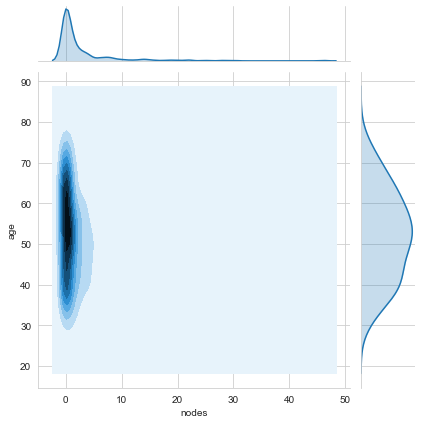

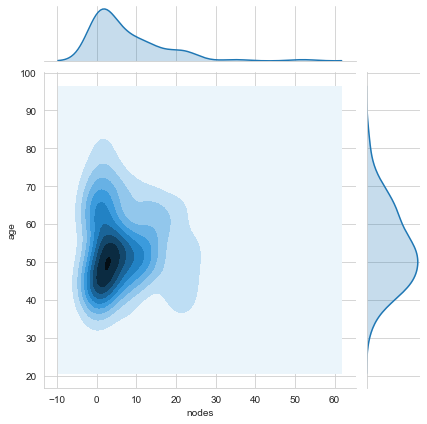

In [73]:
sns.jointplot(x="nodes", y="age", data = habermandata_alive , kind="kde");
plt.show();

sns.jointplot(x="nodes", y="age", data = habermandata_dead , kind="kde");
plt.show();

#### Observation:
1) no dependency between age and number of nodes

### Observation Summary:

1) Patient's age and Year of operation alone are not deciding factors for his/her survival.

2)As the number of positive axillary nodes increase the chance of survival of patient decrease at the same time having zero postivie axillary nodes doesn't guarentee survival as there are cases where patients with zero positive axillary nodes couldn't survive 5 years from the time of operation.

3) Even if we could come up with a simple model which could predict the survival of a patient based on the insights we got , the chance of misclassification is high.

3)The objective of classifying the survival status of a new patient based on given features is a difficuilt task.